In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
def create_samples(num_clusters, num_samples_per_cluster, num_features, embiggen_factor, seed=0):
    np.random.seed(seed)
    
    centroids = []
    slices = []
    
    for i in range(num_clusters):
        cluster_samples = tf.random_normal((num_samples_per_cluster, num_features), mean=0.0, stddev=5.0, dtype=tf.float64, seed=seed, name="cluster_{}".format(i))
        cluster_centroid = np.random.random((1,num_features))*embiggen_factor - (embiggen_factor/2)
        cluster_samples += cluster_centroid
        centroids.append(cluster_centroid)
        slices.append(cluster_samples)
    
    samples = tf.concat(0, slices, name='samples')
    centroids = tf.concat(0, centroids, name='centroids')
        
    return centroids, samples



In [57]:
def plot_clusters(all_samples, centroids, n_samples_per_cluster):
    # Plot out the different clusters
    # Choose a different colour for each cluster
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))
    for i, centroid in enumerate(centroids):
        # Grab just the samples fpr the given cluster and plot them out with a new colour
        samples = all_samples[i*n_samples_per_cluster:(i+1)*n_samples_per_cluster]
        plt.scatter(samples[:,0], samples[:,1], c=colour[i])
        # Also plot centroid
        plt.plot(centroid[0], centroid[1], markersize=35, marker="x", color='k', mew=10)
        plt.plot(centroid[0], centroid[1], markersize=30, marker="x", color='m', mew=5)
    plt.show()


In [58]:
def choose_random_centroids(samples, n_clusters):
    n_samples = tf.shape(samples)[0]
    rand_indices = tf.random_shuffle(tf.range(n_samples))
    centroid_indices = tf.slice(rand_indices, [0,], [n_clusters,])
    initial_centroids = tf.gather(samples, centroid_indices)
    return initial_centroids
    

In [65]:
def assign_to_nearest(samples, centroids):
    expanded_vectors = tf.expand_dims(samples, 0)
    expanded_centroids = tf.expand_dims(centroids, 1)
    distances = tf.reduce_sum( tf.square( tf.sub(expanded_vectors, expanded_centroids) ), 2 )
    mins = tf.argmin(distances, 0)
    return mins


In [72]:
def update_centroids(samples, nearest_indices, n_clusters):
    # Updates the centroid to be the mean of all samples associated with it.
    nearest_indices = tf.to_int32(nearest_indices)
    partitions = tf.dynamic_partition(samples, nearest_indices, n_clusters)
    new_centroids = tf.concat(0, [tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions])
    return new_centroids


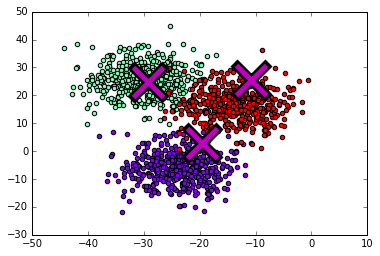

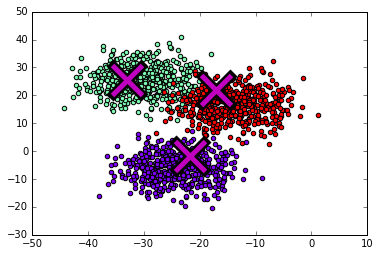

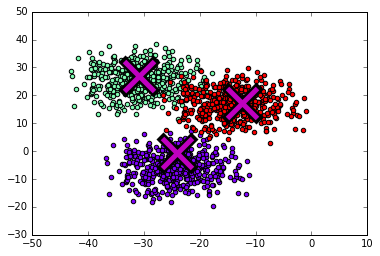

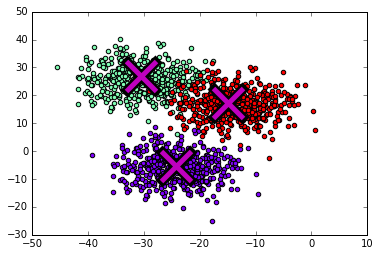

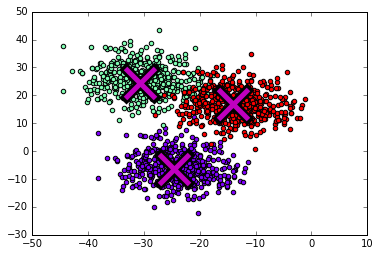

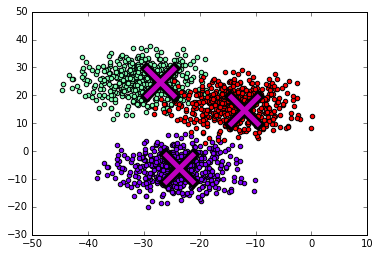

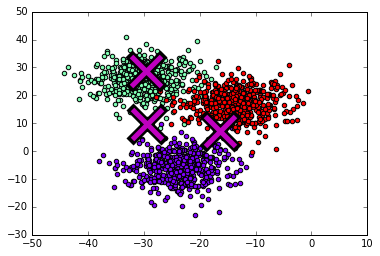

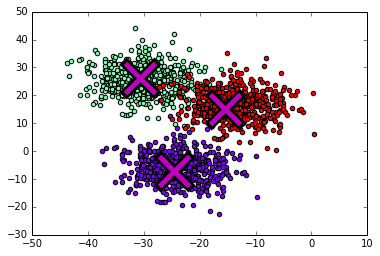

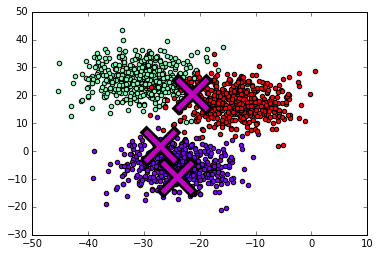

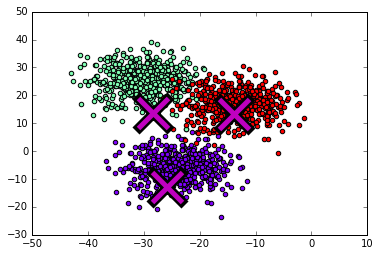

In [75]:
n_features = 2
n_clusters = 3
n_samples_per_cluster = 500
seed = 700
embiggen_factor = 70

np.random.seed(seed)

data_centroids, samples = create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor, seed)
initial_centroids = choose_random_centroids(samples, n_clusters)

model = tf.initialize_all_variables()

with tf.Session() as session:
    for i in range(10):
        nearest_indices = assign_to_nearest(samples, initial_centroids)
        updated_centroids = update_centroids(samples, nearest_indices, n_clusters)

        sample_values = session.run(samples)
        updated_centroid_value = session.run(updated_centroids)
        plot_clusters(sample_values, updated_centroid_value, n_samples_per_cluster)
        

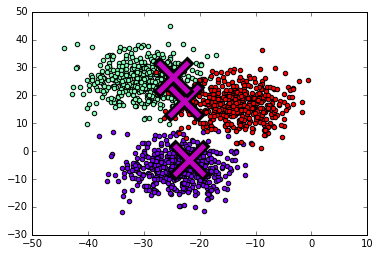

In [74]:
plot_clusters(sample_values, updated_centroid_value, n_samples_per_cluster)


In [71]:
with tf.Session() as session:
    nearest_indices = tf.to_int32(assign_to_nearest(samples, centroids))
    partitions = tf.dynamic_partition(samples, nearest_indices, n_clusters)
    new_centroids = tf.concat(0, [tf.expand_dims(tf.reduce_mean(partition, 0),0) for partition in partitions])
    return new_centroids


[[-23.89763855  -6.01974098]
 [-30.27018817  25.65663777]
 [-13.74019464  16.64001653]]


In [54]:
samples

<tf.Tensor 'samples_2:0' shape=(1500, 2) dtype=float32>

In [67]:
assign_to_nearest(samples, centroids)

<tf.Tensor 'ArgMin_3:0' shape=(1500,) dtype=int64>

In [47]:
s

array([[1, 1],
       [2, 2],
       [3, 0],
       [1, 4],
       [0, 2],
       [0, 0]])

In [48]:
c

array([[3, 3],
       [2, 4]])

In [51]:
s.reshape(1,6,2)-c.reshape(2,1,2)

array([[[-2, -2],
        [-1, -1],
        [ 0, -3],
        [-2,  1],
        [-3, -1],
        [-3, -3]],

       [[-1, -3],
        [ 0, -2],
        [ 1, -4],
        [-1,  0],
        [-2, -2],
        [-2, -4]]])